In [22]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [23]:
# Importando o dataset
base = pd.read_csv("FuelConsumptionCo2.csv")

In [24]:
base.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [25]:
# Encontrando as correlações
base.corr(method='pearson', min_periods=1, numeric_only=True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [26]:
# Modificando os nomes das colunas
base.rename(columns={'FUELCONSUMPTION_CITY': 'FUELCONSCITY', 
                           'FUELCONSUMPTION_HWY': 'FUELCONSHWY',
                           'FUELCONSUMPTION_COMB': 'FUELCONSCOMB',
                          'FUELCONSUMPTION_COMB_MPG': 'FUELCONSCOMBMPG'}, inplace=True)

print("\nDataFrame Modificado")
print(pd.DataFrame(base))


DataFrame Modificado
      MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSCITY  FUELCONSHWY

In [27]:
# Criando um novo dataset com as colunas: ENGINESIZE  CYLINDERS  FUELCONSCOMB  CO2EMISSIONS
NovaBase = base[['ENGINESIZE',  'CYLINDERS',  'FUELCONSCOMB',  'CO2EMISSIONS']]
print("\nDataFrame Modificado")
print(pd.DataFrame(NovaBase))


DataFrame Modificado
      ENGINESIZE  CYLINDERS  FUELCONSCOMB  CO2EMISSIONS
0            2.0          4           8.5           196
1            2.4          4           9.6           221
2            1.5          4           5.9           136
3            3.5          6          11.1           255
4            3.5          6          10.6           244
...          ...        ...           ...           ...
1062         3.0          6          11.8           271
1063         3.2          6          11.5           264
1064         3.0          6          11.8           271
1065         3.2          6          11.3           260
1066         3.2          6          12.8           294

[1067 rows x 4 columns]


In [28]:
# 01. Separando os dados de treino e teste
msk = np.random.rand(len(base)) < 0.80
dfTrain = NovaBase[msk]
dfTest = NovaBase[~msk]
print('Dataset de Treino = ', dfTrain.shape)
print('Dataset de Test   = ', dfTest.shape)

Dataset de Treino =  (857, 4)
Dataset de Test   =  (210, 4)


In [29]:
# Import sklearn library
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Linear Regression Model
regr = linear_model.LinearRegression()

# Training X values (Var Independent - Explanatory)  e Y (Var Dependent - Target)
train_x = np.asanyarray(dfTrain[['ENGINESIZE']])
train_y = np.asanyarray(dfTrain[['CO2EMISSIONS']])

# Performing Line Adjustment
regr.fit(train_x, train_y)

# Defining the values for coefficients - Theta 0: Intercepto e Theta 1: Coeficiente
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[39.30198646]]
Intercept:  [124.97683669]


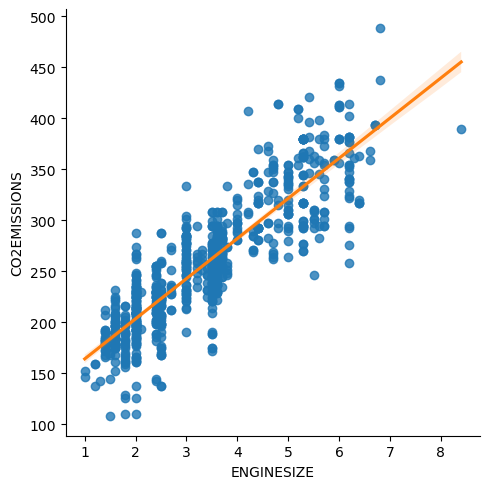

In [30]:
sns.lmplot(x='ENGINESIZE', y='CO2EMISSIONS', line_kws={"color": "C1"}, data=dfTrain)

# # Encontrando o Melhor ajuste (R2-Score) entre as combinações de variáveis abaixo

In [31]:
from sklearn.metrics import r2_score

# Testando os valores de X (Var Independente - Explicativa)  e Y (Var Dependente - Alvo/Target)
test_x = np.asanyarray(dfTest[['ENGINESIZE']])
test_y = np.asanyarray(dfTest[['CO2EMISSIONS']])

# Cálculo do Modelo de Previsão
test_y_ = regr.predict(test_x)

# Verificando os Scores de relação entre as variáveis
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean Absolute Error: 24.84
Residual sum of squares (MSE): 1061.13
R2-score: 0.76


In [32]:
# Testando os valores de X (Var Independente - Explicativa)  e Y (Var Dependente - Alvo/Target)
test_x = np.asanyarray(dfTest[['FUELCONSCOMB']])
test_y = np.asanyarray(dfTest[['CO2EMISSIONS']])

# Cálculo do Modelo de Previsão
test_y_ = regr.predict(test_x)

# Verificando os Scores de relação entre as variáveis
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean Absolute Error: 328.37
Residual sum of squares (MSE): 115763.54
R2-score: -25.51


In [33]:
# Testando os valores de X (Var Independente - Explicativa)  e Y (Var Dependente - Alvo/Target)
test_x = np.asanyarray(dfTest[['CYLINDERS']])
test_y = np.asanyarray(dfTest[['CO2EMISSIONS']])

# Cálculo do Modelo de Previsão
test_y_ = regr.predict(test_x)

# Verificando os Scores de relação entre as variáveis
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean Absolute Error: 99.65
Residual sum of squares (MSE): 11487.01
R2-score: -1.63


# # Realizando uma Regressão Linear Múltipla. Usando as três variáveis: ENGINESIZE, CYLINDERS, FUELCONSCOMB

In [34]:
NovaBase.isnull().sum()

ENGINESIZE      0
CYLINDERS       0
FUELCONSCOMB    0
CO2EMISSIONS    0
dtype: int64

In [35]:
##dataframe com atributos básicos
X = NovaBase[['ENGINESIZE', 'CYLINDERS', 'FUELCONSCOMB']]
X

,ENGINESIZE,CYLINDERS,FUELCONSCOMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6
...,...,...,...
1062,3.0,6,11.8
1063,3.2,6,11.5
1064,3.0,6,11.8
1065,3.2,6,11.3


In [36]:
# Criando o label
y = NovaBase['CO2EMISSIONS']
y

0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64

In [37]:
#Criando a varivel de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# regressão linear
lr= LinearRegression()

# fit
lr.fit(X_train,y_train)

LinearRegression()

In [38]:
# interceptação
c = lr.intercept_
c

66.15948301500467

In [40]:
# coeficiente
coef= lr.coef_
coef

array([11.40860716,  7.76242076,  9.35304675])

In [41]:
# predição com as variaveis de treino
y_pred_train = lr.predict(X_train)
y_pred_train

array([218.12029072, 300.64782729, 337.43791034, 205.96132995,
       260.42972628, 194.00792522, 369.55690583, 229.585277  ,
       360.82052721, 209.90810469, 204.20380111, 251.71395264,
       199.52727773, 205.13910578, 209.81562916, 400.10332354,
       397.6824808 , 303.02202426, 318.61873633, 193.09322552,
       198.18086098, 338.78432709, 259.49442161, 223.41348221,
       258.76467297, 272.38313101, 216.24968137, 241.42560122,
       294.54758079, 241.42560122, 271.65338238, 299.50696658,
       308.76210197, 187.07028539, 186.5460928 , 308.76753779,
       313.00690829, 267.38797109, 258.35356089, 211.68623851,
       180.72870871, 271.65338238, 213.55684785, 173.24627131,
       208.97280001, 311.66049153, 194.96383487, 318.61873633,
       182.59931806, 382.08544645, 341.72392661, 336.48200068,
       203.36097196, 309.27112541, 297.24041431, 216.24968137,
       198.59197306, 312.72948169, 246.10212459, 317.79651217,
       257.09961966, 327.78683202, 194.96383487, 343.04

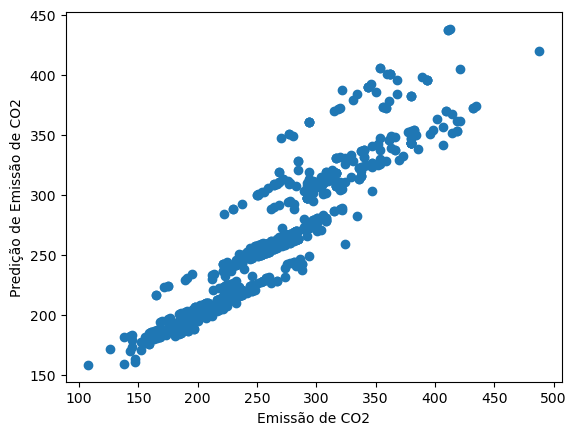

In [44]:
#plotando grafico com as variáveis de treino
plt.scatter(y_train,y_pred_train)
plt.xlabel("Emissão de CO2")
plt.ylabel("Predição de Emissão de CO2")
plt.show()

In [78]:
# Achando o R2 score
r2_score(y_train,y_pred_train)

0.8710308801244371

In [47]:
# predição com as variáveis de testes
y_pred_test = lr.predict(X_test)

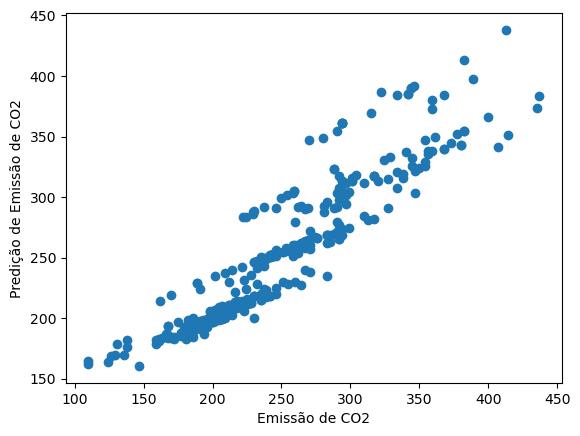

In [48]:
#plotando gráfico das variáveis de teste
plt.scatter(y_test, y_pred_test)
plt.xlabel("Emissão de CO2")
plt.ylabel("Predição de Emissão de CO2")
plt.show()

In [49]:
# Achando o R2 score
r2_score(y_test,y_pred_test)

0.8438097289903992

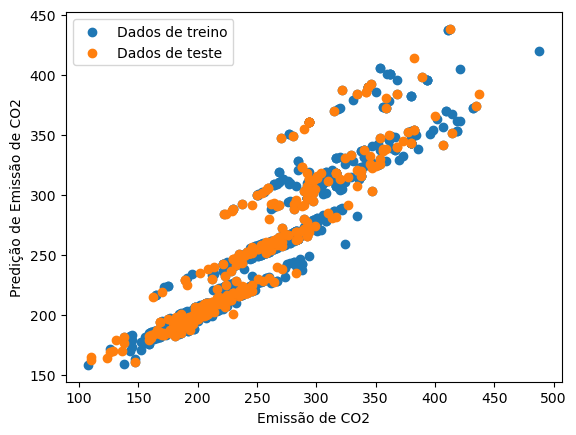

In [76]:
# Sobrepondo os dois gráficos

plt.scatter(y_train,y_pred_train, label="Dados de treino")
plt.scatter(y_test, y_pred_test, label="Dados de teste")
plt.xlabel("Emissão de CO2")
plt.ylabel("Predição de Emissão de CO2")
plt.legend()
plt.show()